In [9]:
import os, glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 'large',
    'figure.dpi': 100,
})

In [10]:
# Import all measurements from the `./measurements` directory. Each measurement file
# is read into a numpy array (column-first) and added to the `meas_dict` (keys are
# filenames with extentions removed).
suffix, sep = 'txt', ','
meas_dict = {}
for fname in glob.glob(f'./measurements/*.{suffix}'):
    with open(fname) as file:
        meas = [[float(el) for el in row.rstrip().split(sep)]
                for row in file.readlines()]
        meas_name, _ = str.rsplit(os.path.basename(fname), '.', maxsplit=1)
        meas_dict[meas_name] = np.array(meas).T

In [11]:
def linear(x, k, c):
    return k*x + c

16.1 & $85 \pm 4$ & $1.36 \pm 0.06$ \\
34.9 & $86 \pm 3$ & $1.38 \pm 0.06$ \\
53.1 & $84 \pm 4$ & $1.35 \pm 0.07$ \\


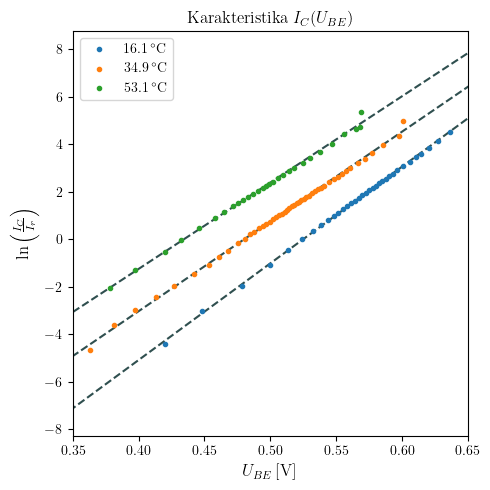

In [16]:
# Plot.
fig, ax = plt.subplots(1, 1, figsize=[5, 5])

result_arr = []
I_ref = 10e-6
log_ΔI_C = np.log(1+ 0.1e-6/10e-6)
for name in ['I_C-16.1', 'I_C-34.9', 'I_C-53.1']:
    U_BE, I_C = meas_dict[name]
    _, T = str.split(name, '-')
    
    ax.scatter(U_BE, np.log(I_C/I_ref), marker='.', label=f'${T}\\,\\mathrm{{^\circ C}}$')
    
    par, cov = curve_fit(
        linear, np.log(I_C/I_ref), U_BE, sigma=[0.01]*len(U_BE), absolute_sigma=True)
    m, c = par
    σ_m, _ = np.sqrt(np.diag(cov))
    
    T = float(T) + 273.15
    ΔT = 0.03 * T
    k_by_e = m/T
    Δk_by_e = np.sqrt(
        (1/T * σ_m)**2 +
        (-m/T**2 * ΔT)**2
    )
    e_0 = 1.602e-19
    k, Δk = k_by_e * e_0, Δk_by_e * e_0
    result_arr.append(
        ((k_by_e, Δk_by_e), (k, Δk)))
    print(
        f'{T - 273.15:.1f} & ${1e6 * k_by_e:.0f} \\pm {1e6 * Δk_by_e:.0f}$ & ${1e23 * k:.2f} \\pm {1e23 * Δk:.2f}$ \\\\')
    
    log_I_lin = np.linspace(-7.5, 8)
    ax.plot(m*log_I_lin+c, log_I_lin, linestyle='--', color='darkslategrey', zorder=-1)
    
    ax.set_xlim(0.35, 0.65)
    ax.set_title(f'Karakteristika $I_C(U_{{BE}})$')
    ax.set_xlabel(r'$U_{BE}\,[\mathrm{V}]$')
    ax.set_ylabel(r'$\ln \left( \frac{I_C}{I_r} \right)$')
ax.legend()
fig.tight_layout()
fig.savefig('I_C-by-U_BE.pdf')

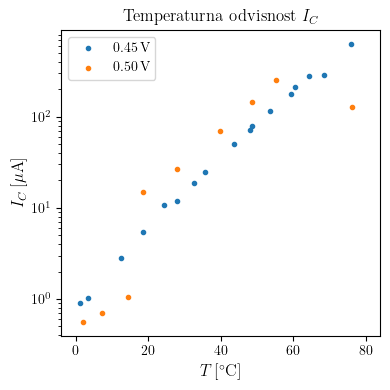

In [20]:
# Plot.
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

for name in ['I_C-0.50', 'I_C-0.45']:
    T, I_C = meas_dict[name]
    I_C = 1e-6 * I_C
    
    ax.scatter(T, 1e6 * I_C, marker='.', label=f'${U_BE}\\,\\mathrm{{V}}$')
    _, U_BE = str.split(name, '-')
    ax.set_xlim(-4, 84)
    ax.set_title(r'Temperaturna odvisnost $I_C$')
    ax.set_xlabel(r'$T\,[\mathrm{^\circ C}]$')
    ax.set_ylabel(r'$I_C\,[\mathrm{\mu A}]$')
    ax.set_yscale('log')
ax.legend()
fig.tight_layout()
fig.savefig('I_C-by-T.pdf')